In [1]:
!uv add "tensorflow-io-gcs-filesystem==0.31.0"

Resolved 145 packages in 0.91ms
Audited 141 packages in 0.17ms


In [2]:
!uv add "tensorflow>=2.19.0"

Resolved 145 packages in 0.89ms
Audited 141 packages in 0.06ms


In [7]:
import tensorflow as tf
from tensorflow.keras import models, layers
from IPython.display import HTML

In [8]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [9]:
!uv add keras

Resolved 146 packages in 37ms
Audited 142 packages in 0.05ms


In [10]:
!uv add "scipy==1.13.1"

Resolved 146 packages in 1ms
Audited 142 packages in 0.05ms


In [11]:
!uv add keras_preprocessing

Resolved 146 packages in 0.98ms
Audited 142 packages in 0.04ms


In [12]:
!uv add pandas

Resolved 146 packages in 1ms
Audited 142 packages in 0.05ms


In [11]:
!uv add matplotlib

Resolved 146 packages in 1ms
Audited 142 packages in 0.04ms


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [2]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=15

In [4]:
#path = r'B:\plant_village\PlantVillage'
#path_train = path+'/train'
#path_val = path+'/valid'
#path_test = r'B:\Plantdisease\test'
#classes_train = len(os.listdir(path_train))
#classes_val = len(os.listdir(path_val))
#print(classes_train,classes_val)

In [13]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "B:\plant_village\PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [14]:
class_names= dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [15]:
len(dataset)

645

In [16]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[115. 102. 111.]
  [110.  97. 106.]
  [105.  92. 101.]
  ...
  [129. 117. 127.]
  [117. 105. 115.]
  [124. 112. 122.]]

 [[107.  94. 103.]
  [106.  93. 102.]
  [106.  93. 102.]
  ...
  [146. 134. 144.]
  [139. 127. 137.]
  [110.  98. 108.]]

 [[106.  93. 102.]
  [105.  92. 101.]
  [105.  92. 101.]
  ...
  [123. 111. 121.]
  [123. 111. 121.]
  [111.  99. 109.]]

 ...

 [[155. 143. 153.]
  [182. 170. 180.]
  [161. 149. 159.]
  ...
  [199. 194. 201.]
  [203. 198. 205.]
  [199. 194. 201.]]

 [[159. 147. 157.]
  [133. 121. 131.]
  [179. 167. 177.]
  ...
  [200. 195. 202.]
  [204. 199. 206.]
  [200. 195. 202.]]

 [[139. 127. 137.]
  [173. 161. 171.]
  [170. 158. 168.]
  ...
  [190. 185. 192.]
  [193. 188. 195.]
  [190. 185. 192.]]]


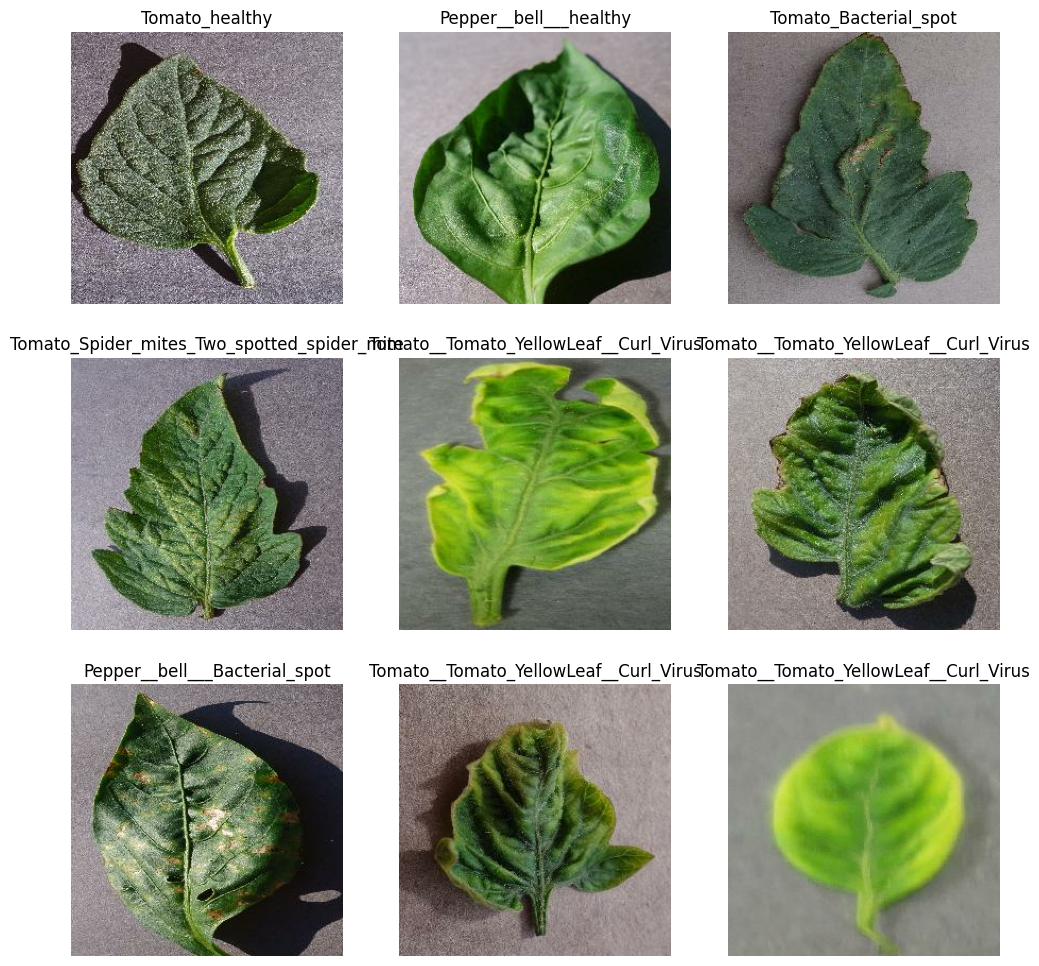

In [17]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):
 for i in range(9):
    ax= plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])  
    plt.axis("off")

In [21]:
!uv add split-folders

Resolved 146 packages in 1ms
Audited 142 packages in 0.04ms


In [22]:
import splitfolders  # Import splitfolders module

# Define input dataset directory (where your PlantVillage dataset is stored)
input_folder = "B:/plant_village/PlantVillage"

# Define output directory where split data will be stored
output_folder = "./dataset_split"

# Split dataset into 80% training, 10% validation, 10% test
splitfolders.ratio(
    input_folder, 
    output=output_folder, 
    seed=42,  # Set a seed for reproducibility
    ratio=(0.8, 0.1, 0.1),  # 80% train, 10% validation, 10% test
    group_prefix=None,  # Keeps images in separate folders based on class
    move=False  # If True, moves files instead of copying
)

print("Dataset successfully split into training, validation, and test sets.")


KeyboardInterrupt: 

In [18]:
train_size= 0.8
len(dataset)*train_size

516.0

In [19]:
train_ds= dataset.take(516)
len(train_ds)

516

In [20]:
test_ds= dataset.skip(516)
len(test_ds)

129

In [21]:
val_size=0.1
len(dataset)*val_size

64.5

In [22]:
val_ds= test_ds.take(64)
len(val_ds)

64

In [23]:
test_ds=test_ds.skip(6)
len(test_ds)

123

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [26]:
#preprocessing data generating
train_generator = ImageDataGenerator(
    zoom_range=0.75,
    shear_range=0.3,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

val_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [27]:
train = train_generator.flow_from_directory(
    directory=r'C:\Users\DELL\Plant_disease\Plant-disease-detection-using-Raspberry-Pi\dataset_split\train',
    target_size=(224,224),
    batch_size=32,
    class_mode="sparse"
)
val = val_generator.flow_from_directory(
    directory=r'C:\Users\DELL\Plant_disease\Plant-disease-detection-using-Raspberry-Pi\dataset_split\val',
    target_size=(224,224),
    batch_size=32,
    class_mode="sparse"
)

Found 16504 images belonging to 15 classes.
Found 2058 images belonging to 15 classes.


In [28]:
train.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [29]:
class_names = list(train.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [30]:
val.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [31]:
count=0
for image_batch, label_batch in train:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[ 35.736275   14.896278   18.995277 ]
  [ 30.445091    9.605103   13.704094 ]
  [ 23.249054    2.4090576   6.5080643]
  ...
  [  9.392349  -12.447647   -6.348648 ]
  [  7.0677032 -14.772293   -8.673294 ]
  [  6.5247498 -15.315247   -9.216248 ]]

 [[ 35.736275   14.896278   18.995277 ]
  [ 30.445091    9.605103   13.704094 ]
  [ 23.249054    2.4090576   6.5080643]
  ...
  [  9.392349  -12.447647   -6.348648 ]
  [  7.0677032 -14.772293   -8.673294 ]
  [  6.5247498 -15.315247   -9.216248 ]]

 [[ 35.736275   14.896278   18.995277 ]
  [ 30.445091    9.605103   13.704094 ]
  [ 23.249054    2.4090576   6.5080643]
  ...
  [  9.392349  -12.447647   -6.348648 ]
  [  7.0677032 -14.772293   -8.673294 ]
  [  6.5247498 -15.315247   -9.216248 ]]

 ...

 [[  5.515602  -19.324394  -20.225395 ]
  [ 12.923256  -11.91674   -12.817741 ]
  [ 21.510109   -3.3298874  -4.2308884]
  ...
  [  9.7237015 -16.116295  -15.017296 ]
  [  6.564354  -19.275642  -18.176643 ]
  [  6.8596725 -18.980324  -17.881325 ]]

 [

In [32]:
import json

with open("class_indices.json", "w") as f:
    json.dump(train.class_indices, f, indent=2)


In [33]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        directory=r'C:\Users\DELL\Plant_disease\Plant-disease-detection-using-Raspberry-Pi\dataset_split\test',
        target_size=(224,224),
        batch_size=32,
        class_mode="sparse"
)

Found 2076 images belonging to 15 classes.


In [34]:
test_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [35]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5609177  0.48248628 0.44719216]
  [0.57544124 0.49700987 0.46171576]
  [0.5899648  0.5115334  0.47623932]
  ...
  [0.6200212  0.5337467  0.48276633]
  [0.56681705 0.48054254 0.42956212]
  [0.5246466  0.43837205 0.38739166]]

 [[0.60257214 0.5241408  0.4888466 ]
  [0.57682574 0.49839443 0.46310028]
  [0.55107945 0.47264808 0.43735397]
  ...
  [0.6253025  0.539028   0.4880476 ]
  [0.54371136 0.45743686 0.40645647]
  [0.5338888  0.44761434 0.39663392]]

 [[0.6664257  0.5879943  0.55270016]
  [0.6690663  0.5906349  0.55534077]
  [0.671707   0.59327555 0.55798143]
  ...
  [0.6305839  0.5443093  0.49332893]
  [0.52060574 0.4343312  0.3833508 ]
  [0.5431311  0.45685658 0.4058762 ]]

 ...

 [[0.6719715  0.60138327 0.5464813 ]
  [0.6745098  0.6039216  0.54901963]
  [0.62498033 0.5543921  0.49949014]
  ...
  [0.67623687 0.57035446 0.4880015 ]
  [0.6782173  0.57233495 0.489982  ]
  [0.67607623 0.57078266 0.48725215]]

 [[0.6745098  0.6039216  0.54901963]
  [0.6730619  0.6024737  0.5475717 ]


In [36]:
def plotImage(imgArr, label):
    for image, lab in zip(imgArr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(image)
        plt.show()

In [37]:
train_img, label = train.next()
train_img.shape

(32, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-122.3374..117.95428].


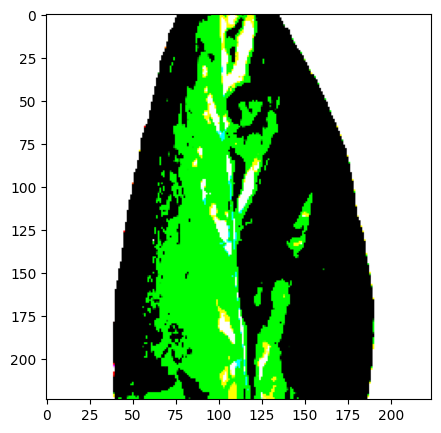

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.52322..82.857].


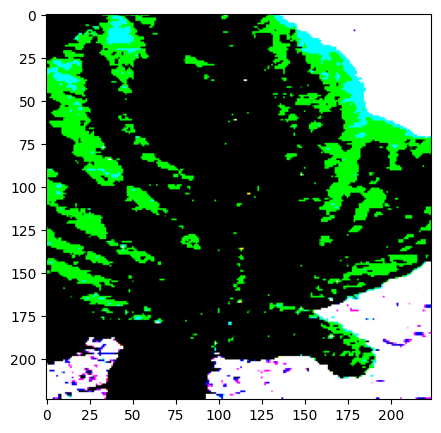

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-114.32898..92.42194].


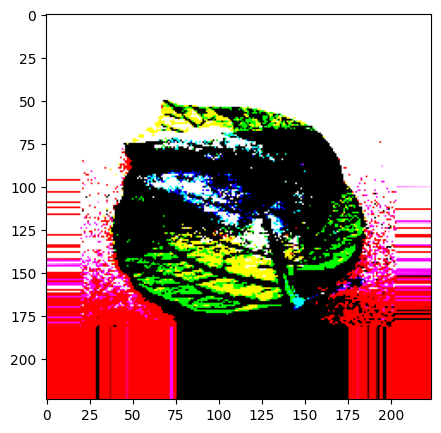

In [38]:
plotImage(train_img[:3], label[:3])

In [38]:
#input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
#n_classes = 15

#model = models.Sequential([
    #layers.InputLayer(input_shape=input_shape),
   # layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Flatten(),
    #layers.Dense(64, activation='relu'),
    #layers.Dense(n_classes, activation='softmax'),
# ])

In [39]:
#model
base_model = ResNet50(
    input_shape=(224,224,3),
    include_top=False
) 

In [40]:
#refrain model from retraining again and again
for layers in base_model.layers:
    layers.trainable = False

In [42]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [43]:
X = Flatten()(base_model.output)

X = Dense(units = 38, activation='softmax')(X)

#final modelling
model = Model(base_model.input, X)

In [44]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 27,401,126 (104.53 MB)

 Trainable params: 3,813,414 (14.55 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
)

In [46]:
#early stopping
#es = EarlyStopping(
    #monitor='val_accuracy', 
    #min_delta=0, 
    #patience=3, 
    #verbose=1,
    #mode='auto'
#)

#model check points
mc = ModelCheckpoint(
    filepath="best_model.h5",
    monitor='val_accuracy',
    # min_delta= 0.01,
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    # period=1
)

# callbacks
cb = [mc]

In [104]:
history = model.fit(
    train,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=val,
    validation_steps=6,
    verbose=1,
    epochs=20,
    callbacks=cb
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8953 - loss: 4.3660
Epoch 1: val_accuracy did not improve from 0.96354
47/47 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.8954 - loss: 4.3608 - val_accuracy: 0.9115 - val_loss: 3.7638
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9119 - loss: 3.9282
Epoch 2: val_accuracy did not improve from 0.96354
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.9119 - loss: 3.9340 - val_accuracy: 0.9271 - val_loss: 4.0370
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9024 - loss: 4.5571
Epoch 3: val_accuracy did not improve from 0.96354
47/47 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.9023 - loss: 4.5616 - val_accuracy: 0.9167 - val_loss: 3.4744
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8916 - loss: 5.9115
Epoch 4: val_accuracy did not improve from 0.96354
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.8918 - loss: 5.8958 - val_accuracy: 0.9271 - val_loss: 3.6973


In [105]:
history

In [106]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [107]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [108]:
len(history.history['loss'])

20

In [109]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [110]:
history.history['loss']

[4.114769458770752,
 4.210422039031982,
 4.7712202072143555,
 5.156181812286377,
 5.057518482208252,
 4.088092803955078,
 4.259787082672119,
 4.349695205688477,
 4.388088226318359,
 4.35366153717041,
 5.85313081741333,
 3.9668540954589844,
 4.730157852172852,
 4.486870765686035,
 5.267331600189209,
 5.300082206726074,
 3.444573163986206,
 4.240010738372803,
 3.493407964706421,
 4.755058288574219]

In [111]:
val_acc

[0.9114583134651184,
 0.9270833134651184,
 0.9166666865348816,
 0.9270833134651184,
 0.890625,
 0.90625,
 0.9322916865348816,
 0.9322916865348816,
 0.9114583134651184,
 0.9010416865348816,
 0.9166666865348816,
 0.9270833134651184,
 0.953125,
 0.9114583134651184,
 0.9114583134651184,
 0.90625,
 0.9479166865348816,
 0.9270833134651184,
 0.921875,
 0.9166666865348816]

In [112]:
history.history['accuracy']

[0.9002659320831299,
 0.9128989577293396,
 0.897606372833252,
 0.8989361524581909,
 0.9002659320831299,
 0.9164438247680664,
 0.9069148898124695,
 0.917553186416626,
 0.9135638475418091,
 0.9055851101875305,
 0.8994565010070801,
 0.9122340679168701,
 0.8969414830207825,
 0.9168882966041565,
 0.9069148898124695,
 0.9055851101875305,
 0.9202127456665039,
 0.9135638475418091,
 0.9264705777168274,
 0.9102393388748169]

In [113]:
acc2

[0.9002659320831299,
 0.9128989577293396,
 0.897606372833252,
 0.8989361524581909,
 0.9002659320831299,
 0.9164438247680664,
 0.9069148898124695,
 0.917553186416626,
 0.9135638475418091,
 0.9055851101875305,
 0.8994565010070801,
 0.9122340679168701,
 0.8969414830207825,
 0.9168882966041565,
 0.9069148898124695,
 0.9055851101875305,
 0.9202127456665039,
 0.9135638475418091,
 0.9264705777168274,
 0.9102393388748169]

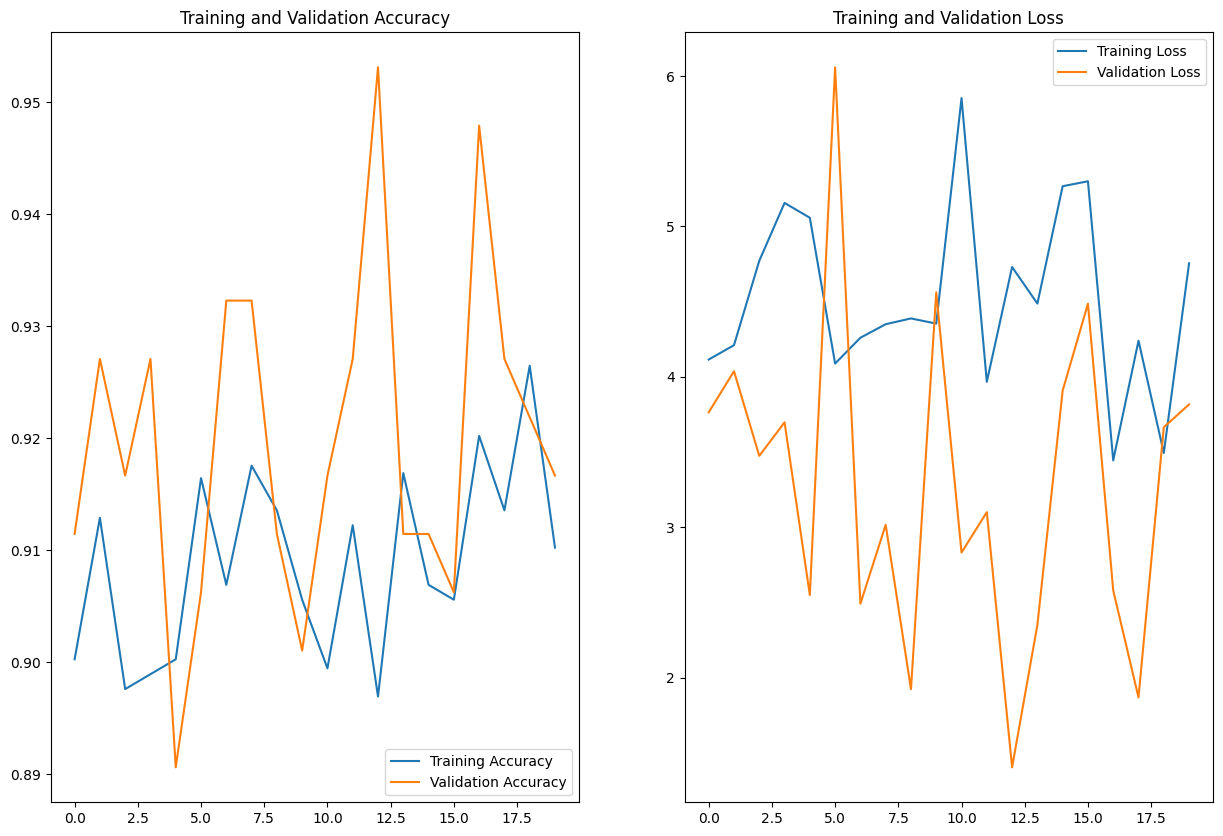

In [115]:
epochs = 20

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc2, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [90]:
#load best model
b_model = load_model(r'C:\Users\DELL\Plant_disease\Plant-disease-detection-using-Raspberry-Pi\best_model.h5')

In [91]:
acc1 = b_model.evaluate(val)[1]
print('The accuracy of model is:',acc1*100,'%')

65/65 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9209 - loss: 2.8444
The accuracy of model is: 92.71137118339539 %


In [93]:
label = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))
label

{0: 'Pepper__bell___Bacterial_spot',
 1: 'Pepper__bell___healthy',
 2: 'Potato___Early_blight',
 3: 'Potato___Late_blight',
 4: 'Potato___healthy',
 5: 'Tomato_Bacterial_spot',
 6: 'Tomato_Early_blight',
 7: 'Tomato_Late_blight',
 8: 'Tomato_Leaf_Mold',
 9: 'Tomato_Septoria_leaf_spot',
 10: 'Tomato_Spider_mites_Two_spotted_spider_mite',
 11: 'Tomato__Target_Spot',
 12: 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 13: 'Tomato__Tomato_mosaic_virus',
 14: 'Tomato_healthy'}

first image to predict
actual label: Tomato_healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
predicted label: Tomato_Late_blight


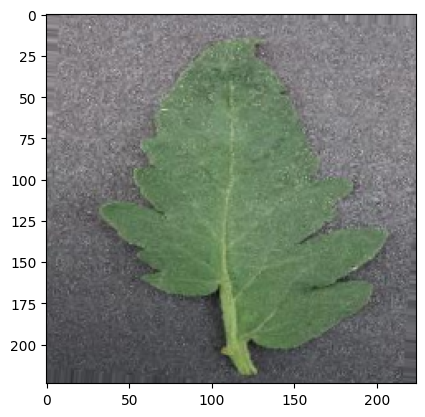

In [94]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [95]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


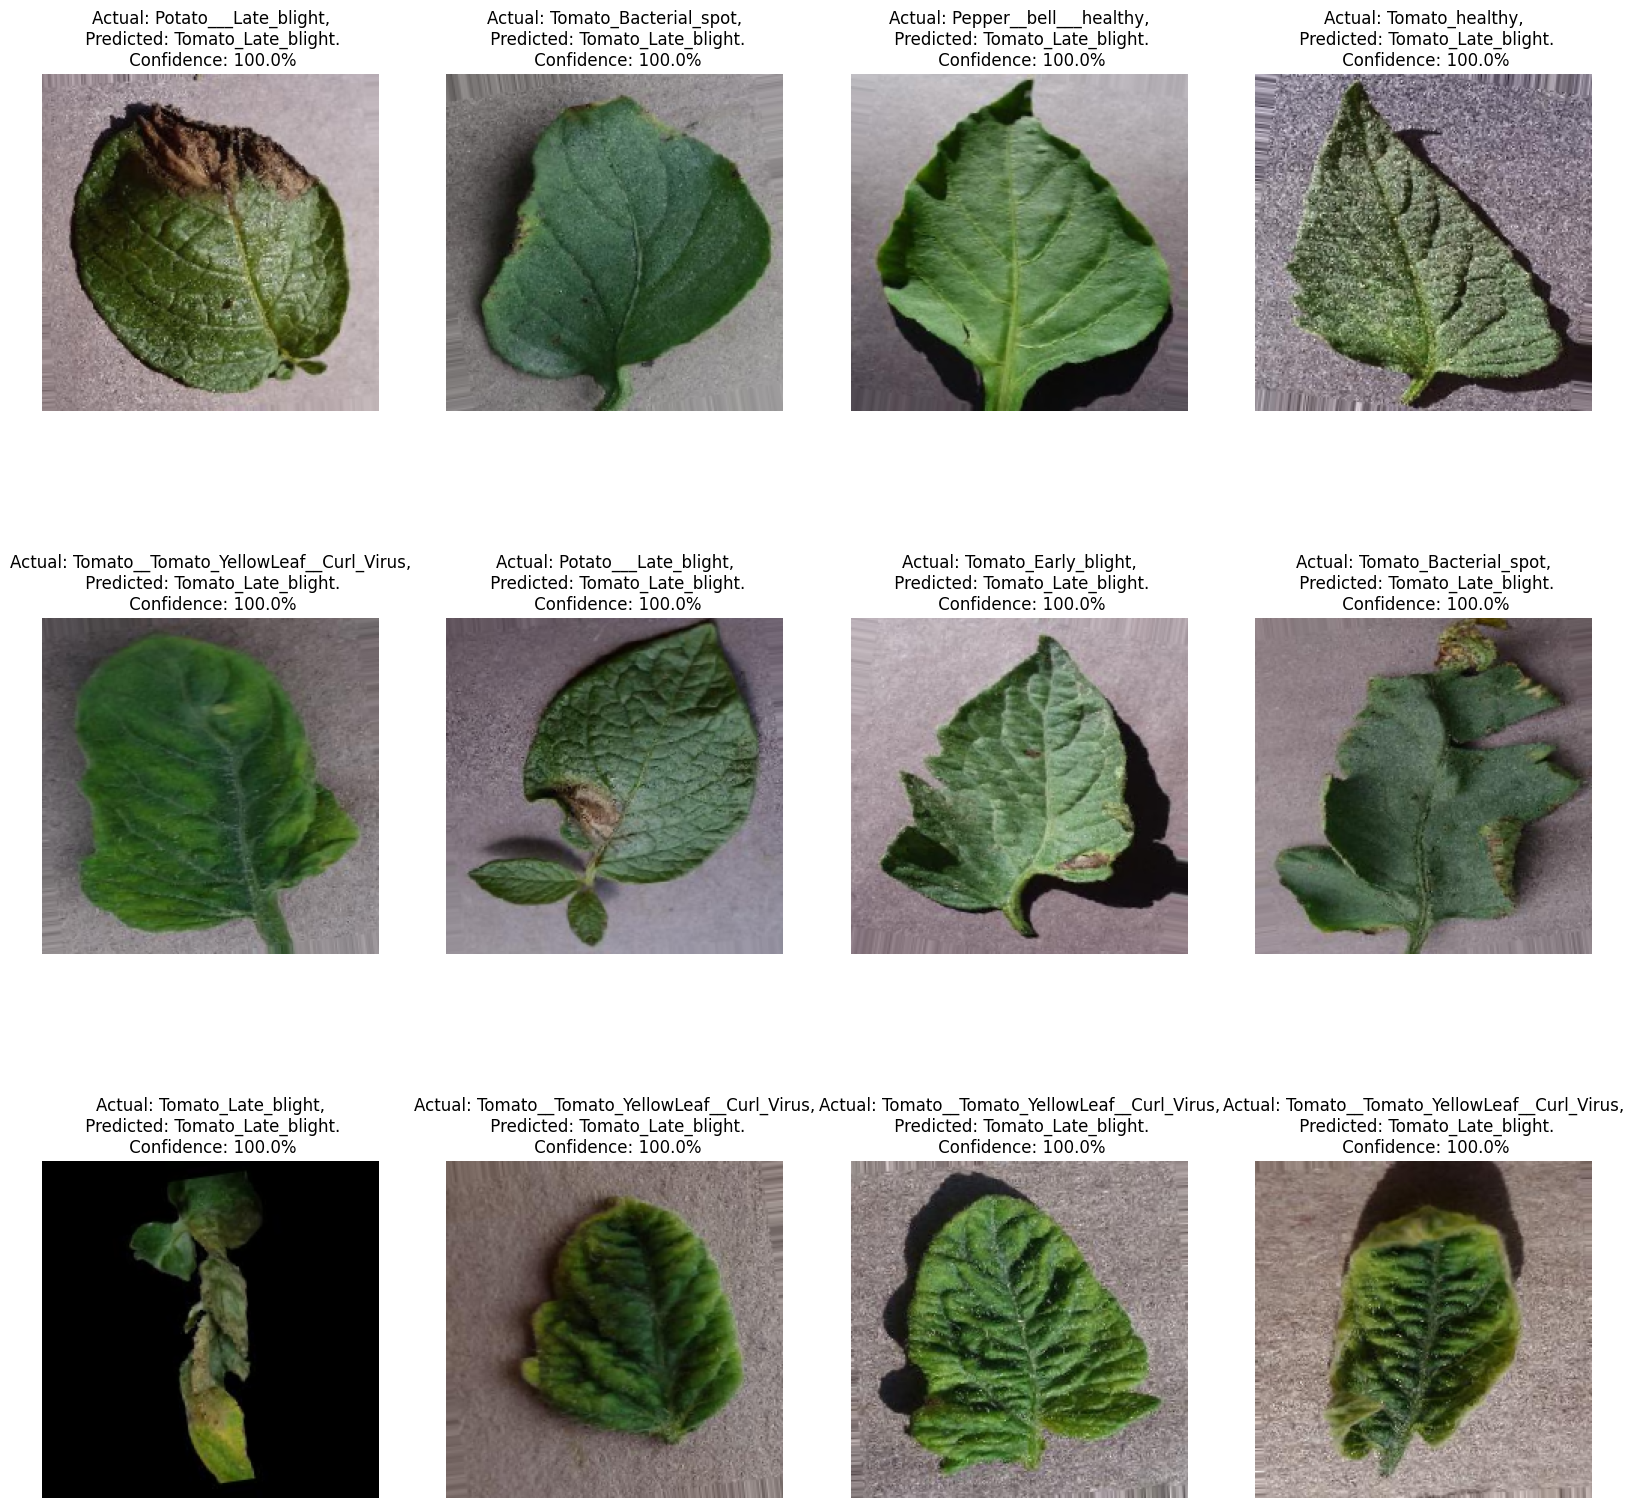

In [96]:
plt.figure(figsize=(20, 20))
for images, labels in test_generator:
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model,images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [97]:
severity_mapping = {
    "Pepper__bell___Bacterial_spot": "Medium Infection",
    "Pepper__bell___healthy": "None",

    "Potato___Early_blight": "Medium Infection",
    "Potato___Late_blight": "High Infection",
    "Potato___healthy": "None",

    "Tomato_Bacterial_spot": "Medium Infection",
    "Tomato_Early_blight": "Medium Infection",
    "Tomato_Late_blight": "High Infection",
    "Tomato_Leaf_Mold": "Medium Infection",
    "Tomato_Septoria_leaf_spot": "Low Infection",
    "Tomato_Spider_mites_Two_spotted_spider_mite": "Low Infection",
    "Tomato__Target_Spot": "Medium Infection",
    "Tomato__Tomato_YellowLeaf__Curl_Virus": "High Infection",
    "Tomato__Tomato_mosaic_virus": "Medium Infection",
    "Tomato_healthy": "None"
}




In [98]:
def prediction(path):
    #plt.figure(figsize=(15, 15))
    orig_img = load_img(path, target_size=(224,224))
    i = img_to_array(orig_img)

    im = preprocess_input(i)
    img = np.expand_dims(orig_img, axis=0)
    
    pred_probs = b_model.predict(img)[0]  # Get probability scores
    pred_class = np.argmax(pred_probs)  # Original class prediction
    confidence = round(100*(np.max(pred_probs)),2)  # Confidence score
    plt.imshow(orig_img)
    
    path = os.path.normpath(path)
    original_label = path.split(os.sep)[-2]

    predicted_class = class_names[pred_class]
    severity = severity_mapping.get(predicted_class, "Unknown")


    #print(label[pred_class])
    # Define thresholds for severity levels
    #if confidence > 70:
     #   severity = "High Infection"
    #elif confidence > 40:
     #   severity = "Medium Infection"
    #else:
     #   severity = "Low Infection"
    
    return original_label, class_names[pred_class], severity, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
original label: Tomato__Tomato_mosaic_virus
predicted label: Tomato__Tomato_mosaic_virus
severity: Medium Infection
confidence: 100.0


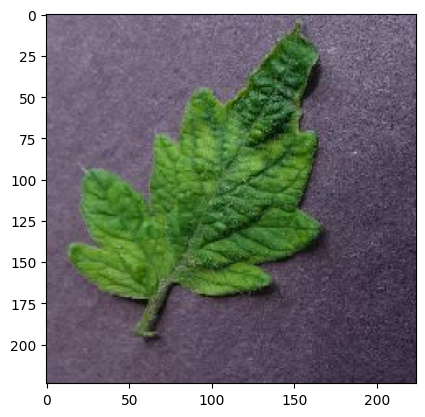

In [99]:
path = r'C:\Users\DELL\Plant_disease\Plant-disease-detection-using-Raspberry-Pi\dataset_split\test\Tomato__Tomato_mosaic_virus\33f5422e-7889-4ab4-ab53-93507cc83f78___PSU_CG 2261.JPG'

result = prediction(path)
print(f"original label: {result[0]}\npredicted label: {result[1]}\nseverity: {result[2]}\nconfidence: {result[3]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
original label: Tomato_Late_blight
predicted label: Tomato_Late_blight
severity: High Infection
confidence: 100.0


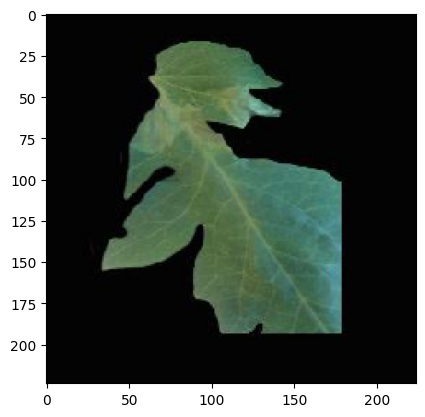

In [100]:
path = r'C:\Users\DELL\Plant_disease\Plant-disease-detection-using-Raspberry-Pi\dataset_split\test\Tomato_Late_blight\4be2e7c4-f539-41c3-975b-a1ff17b516ec___GHLB_PS Leaf 2 Day 8.jpg'

result = prediction(path)
print(f"original label: {result[0]}\npredicted label: {result[1]}\nseverity: {result[2]}\nconfidence: {result[3]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
original label: Pepper__bell___healthy
predicted label: Pepper__bell___healthy
severity: None
confidence: 100.0


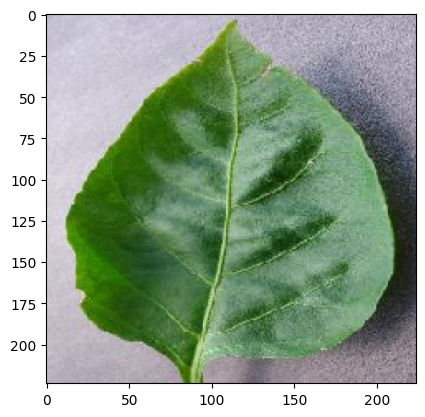

In [101]:
path = r'C:\Users\DELL\Plant_disease\Plant-disease-detection-using-Raspberry-Pi\dataset_split\test\Pepper__bell___healthy\8a74cfbd-1444-4cbe-be09-2554ee4b7032___JR_HL 8074.JPG'

result = prediction(path)
print(f"original label: {result[0]}\npredicted label: {result[1]}\nseverity: {result[2]}\nconfidence: {result[3]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
original label: Tomato_Early_blight
predicted label: Tomato_Early_blight
severity: Medium Infection
confidence: 100.0


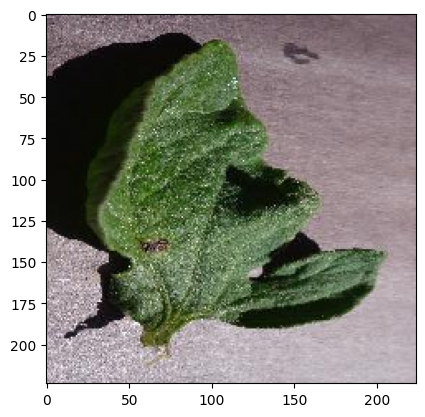

In [102]:
path = r'C:\Users\DELL\Plant_disease\Plant-disease-detection-using-Raspberry-Pi\dataset_split\test\Tomato_Early_blight\8ed69ac4-4692-4154-a484-8a693ff7de64___RS_Erly.B 7775.JPG'

result = prediction(path)
print(f"original label: {result[0]}\npredicted label: {result[1]}\nseverity: {result[2]}\nconfidence: {result[3]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
original label: Tomato_Septoria_leaf_spot
predicted label: Tomato_Septoria_leaf_spot
severity: Low Infection
confidence: 100.0


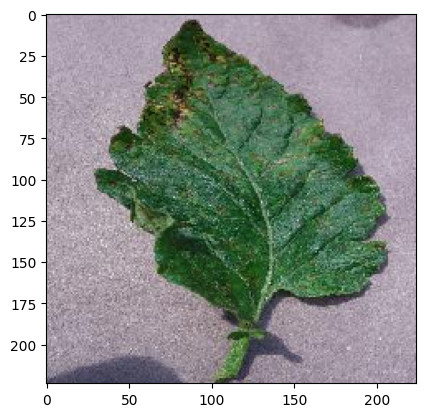

In [103]:
path = r'C:\Users\DELL\Plant_disease\Plant-disease-detection-using-Raspberry-Pi\dataset_split\test\Tomato_Septoria_leaf_spot\8d370ca1-f143-4298-bede-e495da068cc0___Matt.S_CG 1315.JPG'

result = prediction(path)
print(f"original label: {result[0]}\npredicted label: {result[1]}\nseverity: {result[2]}\nconfidence: {result[3]}")